---

***Now that we have discussed what is data preprocessing, let us dive into some code to complete preprocessing for getting our datasets ready for model building***



---


First we will pre-process the categorical features and then the numerical features on all the 3 available tables.

---

## `PREPROCESSING: CATEGORICAL FEATURES`

- Find out and impute, if we have missing values in the categorical features.
- Remove the features which do not add much information
- Choose an Encoding scheme to convert categorical feature into numeric.



---

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

---
### `DATASET 1: Weekly Sales Data` contains the following features

- **WEEK_END_DATE** - week date
- **STORE_NUM** - store number
- **UPC** - (Universal Product Code) product specific identifier
- **BASE_PRICE** - base price of item
- **DISPLAY** - product was a part of in-store promotional display
- **FEATURE** - product was in in-store circular
- **UNITS** - units sold (target)

---

In [2]:
# read the train data
data = pd.read_csv('dataset/train.csv')

In [3]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35


---

###  `WEEKLY SALES DATA`  has the following categorical features

    - STORE_NUM
    - UPC
    - FEATURE
    - DISPLAY
    
---

In [4]:
# check for the null values in the categorical features
data[['STORE_NUM', 'UPC', 'FEATURE', 'DISPLAY']].isna().sum()

STORE_NUM    0
UPC          0
FEATURE      0
DISPLAY      0
dtype: int64

***No Null Values***

---
 -  `STORE_NUM` - No changes required as it is a key and will be used to merge tables later.
 -  `UPC      ` - No changes required as it is a key and will be used to merge tables later.
 -  `FEATURE  ` - No Preprocessing Required
 -  `DISPLAY  ` - No Preprocessing Required
 ---

---

### `DATASET 2: PRODUCT DATA` contains the details about the products

- **UPC** - (Universal Product Code) product specific identifier
- **DESCRIPTION**	- product description
- **MANUFACTURER** - product	manufacturer
- **CATEGORY** - category of product
- **SUB_CATEGORY** - sub-category of product
- **PRODUCT_SIZE** - package size or quantity of product

---

In [5]:
# read the product data
product_data = pd.read_csv('dataset/product_data.csv')

In [6]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


---

### `PRODUCT DATA`  has the following categorical features

    - UPC
    - DESCRIPTION
    - MANUFACTURER
    - CATEGORY
    - SUB_CATEGORY
    - PRODUCT_SIZE
    
---

In [7]:
# shape of the data
product_data.shape

(30, 6)

In [8]:
# check for the null values in the categorical features
product_data[['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY', 'PRODUCT_SIZE']].isna().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

***No Null Values***

In [9]:
# number of unique description
product_data.DESCRIPTION.nunique()

29

In [10]:
# number of unique manufacturer
product_data.MANUFACTURER.nunique()

9

In [11]:
# number of unique categories
product_data.CATEGORY.nunique()

4

In [12]:
# number of unique sub categories
product_data.SUB_CATEGORY.nunique()

7

In [13]:
# number of unique product sizes
product_data.PRODUCT_SIZE.nunique()

16

---
 - `DESCRIPTION` - In the description, we have category, subcategory and size of the product and these are already present in the other features as well. So, We will drop this feature as it will not add much value to the model.
 - `MANUFACTURER`, `CATEGORY`, `SUB_CATEGORY`- As, there is no order in the given categories, so we will One Hot Encode this features.
 - `PRODUCT_SIZE` - The product size units are different for different categories of products. So, here for each category we will do the binning based on different sizes.
---

In [14]:
# drop the DESCRIPTION FEATURE
product_data = product_data.drop(columns= ['DESCRIPTION'])

In [15]:
product_data

,UPC,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
5,1111085319,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
6,1111085345,PRIVATE LABEL,COLD CEREAL,ADULT CEREAL,20 OZ
7,1111085350,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
8,1111087395,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,32.7 OZ
9,1111087396,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,30.5 OZ


In [16]:
# remove the units from the product size
# we will keep only the values
product_data['PRODUCT_SIZE'] = product_data.PRODUCT_SIZE.apply(lambda x: x.split()[0])

In [17]:
# change data type of product size from string to float
product_data.PRODUCT_SIZE = product_data.PRODUCT_SIZE.astype(float)

In [18]:
# Let's see the unique product size values for each category
product_data.groupby(['CATEGORY'])['PRODUCT_SIZE'].unique()

CATEGORY
BAG SNACKS                                  [15.0, 16.0, 10.0]
COLD CEREAL              [12.25, 20.0, 18.0, 12.0, 15.0, 12.2]
FROZEN PIZZA              [32.7, 30.5, 29.6, 29.8, 28.3, 22.7]
ORAL HYGIENE PRODUCTS                             [500.0, 1.0]
Name: PRODUCT_SIZE, dtype: object

In [19]:
# define 3 bins for category type = "COLD CEREAL"
product_data.loc[product_data.CATEGORY == 'COLD CEREAL', 'PRODUCT_SIZE'] = pd.cut(product_data.PRODUCT_SIZE,
                                                                                 bins=[10,13,16,21],
                                                                                 labels=[1,2,3])

In [20]:
# define 2 bins for category type = "ORAL HYGIENE PRODUCTS"
product_data.loc[product_data.CATEGORY == 'ORAL HYGIENE PRODUCTS', 'PRODUCT_SIZE'] = pd.cut(product_data.PRODUCT_SIZE,
                                                                                            bins=[0,501,1001],
                                                                                            labels=[1,2])

In [21]:
# define 3 bins for category type = "FROZEN PIZZA"
product_data.loc[product_data.CATEGORY == 'FROZEN PIZZA', 'PRODUCT_SIZE'] = pd.cut(product_data.PRODUCT_SIZE,
                                                                                   bins=[20,25,30,35],
                                                                                   labels=[1,2,3])

In [22]:
# define 2 bins for category type = "BAG SNACKS"
product_data.loc[product_data.CATEGORY == 'BAG SNACKS', 'PRODUCT_SIZE'] = pd.cut(product_data.PRODUCT_SIZE,
                                                                                 bins=[9,14,20],
                                                                                 labels=[1,2])

In [23]:
# value counts of PRODUCT SIZE
product_data.PRODUCT_SIZE.value_counts()

1    12
2    11
3     7
Name: PRODUCT_SIZE, dtype: int64

In [24]:
# One Hot Encode the features
OHE_p = ce.OneHotEncoder(cols= ['MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'])

In [25]:
# transform the data
product_data = OHE_p.fit_transform(product_data)

In [26]:
# updated data
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
# shape of the updated data
product_data.shape

(30, 22)

In [28]:
# columns of the updated data
product_data.columns

Index(['UPC', 'MANUFACTURER_1', 'MANUFACTURER_2', 'MANUFACTURER_3',
       'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6', 'MANUFACTURER_7',
       'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1', 'CATEGORY_2',
       'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1', 'SUB_CATEGORY_2',
       'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5', 'SUB_CATEGORY_6',
       'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')

---
### `DATASET 3: STORE DATA`

- **STORE_ID** - store number
- **STORE_NAME** - Name of store
- **ADDRESS_CITY_NAME** - city
- **ADDRESS_STATE_PROV_CODE** - state
- **MSA_CODE** - (Metropolitan Statistical Area) Based on geographic region and population density
- **SEG_VALUE_NAME** - Store Segment Name
- **PARKING_SPACE_QTY** - number of parking spaces in the store parking lot
- **SALES_AREA_SIZE_NUM** - square footage of store
- **AVG_WEEKLY_BASKETS** - average weekly baskets sold in the store

---

In [29]:
# read the store data
store_data = pd.read_csv('dataset/store_data.csv')

In [30]:
store_data.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053


---

### `STORE DATA`  has the following categorical features

    - STORE_ID
    - STORE_NAME
    - ADDRESS_CITY_NAME
    - ADDRESS_STATE_PROV_CODE
    - MSA_CODE
    - SEG_VALUE_NAME
    
---    

In [31]:
# shape of the store data
store_data.shape

(76, 9)

In [32]:
# check for the null values

store_data[['STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME', 'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME']].isna().sum()

STORE_ID                   0
STORE_NAME                 0
ADDRESS_CITY_NAME          0
ADDRESS_STATE_PROV_CODE    0
MSA_CODE                   0
SEG_VALUE_NAME             0
dtype: int64

In [33]:
# number of unique store names
store_data.STORE_NAME.nunique()

72

In [34]:
# number of unique city names
store_data.ADDRESS_CITY_NAME.nunique()

51

In [35]:
# number of unique state provision code
store_data.ADDRESS_STATE_PROV_CODE.nunique()

4

In [36]:
# number of unique msa code
store_data.MSA_CODE.nunique()

9

In [37]:
# number of unique segment value names
store_data.SEG_VALUE_NAME.nunique()

3

---

   - `STORE_ID` - No changes required as it is a key and will be used to merge files later.
   - `STORE_NAME` - Since, Out of 76 different stores we have 72 unique store names. Store name contains some location information of the store which we have in the form of address city name and state.
   - `ADDRESS_CITY_NAME` - Since, Out of 76 different stores we have 51 unique address city names, So we will drop this feature due to high cardinality
   - `ADDRESS_STATE_PROV_CODE`, `MSA_CODE` - As, there is no order in the given categories, So, we will One Hot Encode this variable.
   - `SEG_VALUE_NAME` - Stores segments are divided into 3 categories: upscale, mainstream and value. Upscale stores are just what they sound like; they are normally located in high income neighborhoods and offer more high-end product. Mainstream is middle of the road, mostly located in middle class areas, offering a mix of upscale and value product. Value stores cater more to low income customers, so there will be more focus on low prices than anything else.
   
   So we will map `VALUE AS 1`, `MAINSTREAM AS 2` and `UPSCALE AS 3`.

In [38]:
# drop store name and address
store_data = store_data.drop(columns=['STORE_NAME', 'ADDRESS_CITY_NAME'])

In [39]:
# OneHotEncode the rest of the categorical features
OHE = ce.OneHotEncoder(cols=['ADDRESS_STATE_PROV_CODE', 'MSA_CODE'])

store_data.SEG_VALUE_NAME = store_data.SEG_VALUE_NAME.map({'VALUE': 1, 'MAINSTREAM' : 2, 'UPSCALE': 3})

In [40]:
# transform the data
store_data = OHE.fit_transform(store_data)

In [41]:
# updated data
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


In [42]:
# shape of the updated data
store_data.shape

(76, 18)

In [43]:
# columns of the updated data
store_data.columns

Index(['STORE_ID', 'ADDRESS_STATE_PROV_CODE_1', 'ADDRESS_STATE_PROV_CODE_2',
       'ADDRESS_STATE_PROV_CODE_3', 'ADDRESS_STATE_PROV_CODE_4', 'MSA_CODE_1',
       'MSA_CODE_2', 'MSA_CODE_3', 'MSA_CODE_4', 'MSA_CODE_5', 'MSA_CODE_6',
       'MSA_CODE_7', 'MSA_CODE_8', 'MSA_CODE_9', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [44]:
store_data.loc[0]

STORE_ID                       367.0
ADDRESS_STATE_PROV_CODE_1        1.0
ADDRESS_STATE_PROV_CODE_2        0.0
ADDRESS_STATE_PROV_CODE_3        0.0
ADDRESS_STATE_PROV_CODE_4        0.0
MSA_CODE_1                       1.0
MSA_CODE_2                       0.0
MSA_CODE_3                       0.0
MSA_CODE_4                       0.0
MSA_CODE_5                       0.0
MSA_CODE_6                       0.0
MSA_CODE_7                       0.0
MSA_CODE_8                       0.0
MSA_CODE_9                       0.0
SEG_VALUE_NAME                   1.0
PARKING_SPACE_QTY              196.0
SALES_AREA_SIZE_NUM          24721.0
AVG_WEEKLY_BASKETS           12707.0
Name: 0, dtype: float64

---
---

## `PREPROCESSING: NUMERICAL FEATURES`

- Check and impute the missing values in the numerical features.
- Check for the outliers and treat them.

---

---

### `DATASET 1: WEEKLY SALES DATA`

---

In [45]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35


---

### `WEEKLY SALES DATA`  has the following numerical features

    - BASE_PRICE
    - UNITS (Target)
    
---    

 - `BASE_PRICE` - Missing Value Imputation
---

In [46]:
# check the null values for the numerical features
data[[ 'BASE_PRICE', 'UNITS']].isna().sum()

BASE_PRICE    12
UNITS          0
dtype: int64

***Imputing the missing values in the Base Price***

---

In [47]:
# create a new dataframe which will have "average base price" for the combination of STORE_NUM and UPC
# we will use this to impute the missing values 
avg_price = data.groupby(['STORE_NUM', 'UPC'])['BASE_PRICE'].mean().reset_index()

In [48]:
avg_price

,STORE_NUM,UPC,BASE_PRICE
0,367,1111009477,1.489859
1,367,1111009497,1.490634
2,367,1111085319,1.843451
3,367,1111085345,1.827183
4,367,1111085350,2.322113
5,367,1111087395,4.365396
6,367,1111087396,4.409635
7,367,1111087398,4.377029
8,367,1600027527,3.117042
9,367,1600027528,4.631620


In [49]:
# null values in BASE PRICE
data.loc[data.BASE_PRICE.isna() == True]

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
279,14-Jan-09,4245,1111087395,NaN,0,1,56
280,14-Jan-09,4245,1111087398,NaN,0,1,72
301,14-Jan-09,4259,1111087395,NaN,0,1,52
303,14-Jan-09,4259,1111087398,NaN,0,1,52
1918,21-Jan-09,4245,1111087395,NaN,0,1,52
1919,21-Jan-09,4245,1111087398,NaN,0,1,82
1940,21-Jan-09,4259,1111087395,NaN,0,1,28
3555,28-Jan-09,4245,1111087395,NaN,1,1,45
3556,28-Jan-09,4245,1111087398,NaN,1,1,34
3577,28-Jan-09,4259,1111087395,NaN,1,1,31


In [50]:
# define function to fill missing base price values
def fill_base_price(x) :
    return avg_price.BASE_PRICE[(avg_price.STORE_NUM == x['STORE_NUM']) & (avg_price.UPC == x['UPC'])].values[0]

In [51]:
data.BASE_PRICE[data.BASE_PRICE.isna() == True] = data[data.BASE_PRICE.isna() == True].apply(fill_base_price, axis=1)

<IPython.core.display.Javascript object>


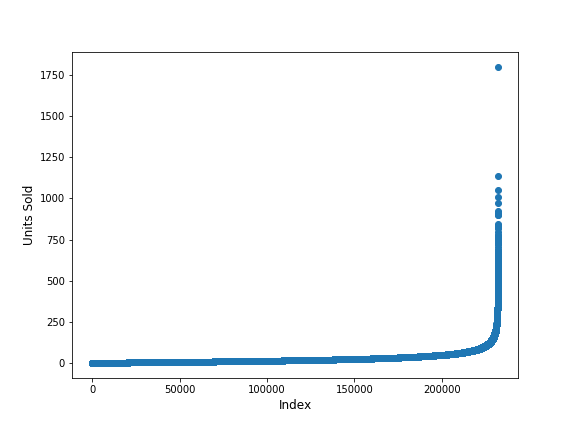

In [52]:
# scatter plot for UNITS variable
# sort the target variable and scatter plot to see if it has some outliers or not.  

%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(x = range(data.shape[0]), y = np.sort(data['UNITS'].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

In [53]:
# number of data points where units are more than 750
data['UNITS'][data.UNITS > 750].shape[0]

21

---

***We can see that, there are a some points above where UNITS are more than 750 and there number is only 21. So, we can remove them as there number is only 21 and will not affect the data and these will act as a noise to our model.***

---

In [54]:
data.shape

(232287, 7)

In [55]:
# remove the valures where UNITS are more than 750
data = data[~(data.UNITS > 750)]

In [56]:
data[data.UNITS > 750].shape[0]

0

---

### `DATASET 2: PRODUCT DATA`

---

In [57]:
# view the product data
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


---

### `PRODUCT DATA`  has the following numerical feature

    - This dataset has no numerical feature.
    
---    

---

### `DATASET 3: STORE DATA`

---

In [58]:
# view the data
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


---

### `STORE DATA`  has the following numerical features

    - PARKING_SPACE_QTY
    - SALES_AREA_SIZE_NUM
    - AVG_WEEKLY_BASKETS
    
---    

In [59]:
# shape of the data
store_data.shape

(76, 18)

In [60]:
# check for the null values
store_data[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS']].isna().sum()

PARKING_SPACE_QTY      51
SALES_AREA_SIZE_NUM     0
AVG_WEEKLY_BASKETS      0
dtype: int64

---
- `PARKING_SPACE_QTY` - Check its correlation with the `SALES_AREA_SIZE_NUM`

---

In [61]:
# check correlation
store_data[['PARKING_SPACE_QTY','SALES_AREA_SIZE_NUM']].corr()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM
PARKING_SPACE_QTY,1.000000,0.763274
SALES_AREA_SIZE_NUM,0.763274,1.000000


***Note:*** Since the correlation of the **PARKING_SPACE_QTY** with **SALES_AREA_SIZE_NUM** is high so we can drop this column as it will not add much value to the model.

---

In [62]:
# drop the column
store_data = store_data.drop(columns=['PARKING_SPACE_QTY'])

---
### `SAVE THE UPDATED FILES`

---

In [63]:
data.to_csv('updated_train_data.csv',index=False)
product_data.to_csv('updated_product_data.csv',index=False)
store_data.to_csv('updated_store_data.csv',index=False)